# 단순 선형 회귀

# 손실 함수 계산

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

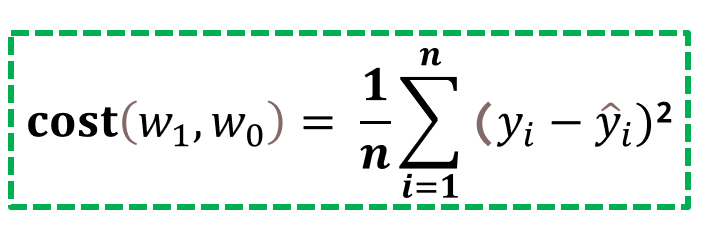

In [17]:
# 학습률 0.5
w1_list = [ w for w in np.arange(-4, 4.5, 0.5)]
y = [1, 2, 3]
X = [1, 2, 3]
cost = []
for w1 in w1_list:
    residual_sum = 0
    for i in range(0,3):
        residual = (y[i] - w1 * X[i])**2
        residual_sum += residual
    each_cost = residual_sum / len(y)
    cost.append({w1: each_cost})
print(cost)  


[{-4.0: 116.66666666666667}, {-3.5: 94.5}, {-3.0: 74.66666666666667}, {-2.5: 57.166666666666664}, {-2.0: 42.0}, {-1.5: 29.166666666666668}, {-1.0: 18.666666666666668}, {-0.5: 10.5}, {0.0: 4.666666666666667}, {0.5: 1.1666666666666667}, {1.0: 0.0}, {1.5: 1.1666666666666667}, {2.0: 4.666666666666667}, {2.5: 10.5}, {3.0: 18.666666666666668}, {3.5: 29.166666666666668}, {4.0: 42.0}]


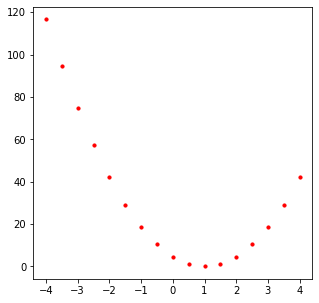

In [18]:
# w와 cost와의 관계 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
for i in range(len(cost)):
    plt.scatter(cost[i].keys(), cost[i].values(), c='r', s=10)
    

In [19]:
# 학습률 0.1
w1_list = [ w for w in np.arange(-4, 4.5, 0.1)]
y = [1, 2, 3]
X = [1, 2, 3]
cost = []
for w1 in w1_list:
    residual_sum = 0
    for i in range(0,3):
        residual = (y[i] - w1 * X[i])**2
        residual_sum += residual
    each_cost = residual_sum / len(y)
    cost.append({w1: each_cost})
print(cost)  


[{-4.0: 116.66666666666667}, {-3.9: 112.04666666666667}, {-3.8: 107.51999999999998}, {-3.6999999999999997: 103.08666666666666}, {-3.5999999999999996: 98.74666666666666}, {-3.4999999999999996: 94.49999999999999}, {-3.3999999999999995: 90.34666666666665}, {-3.2999999999999994: 86.28666666666663}, {-3.1999999999999993: 82.31999999999996}, {-3.099999999999999: 78.44666666666664}, {-2.999999999999999: 74.66666666666663}, {-2.899999999999999: 70.97999999999996}, {-2.799999999999999: 67.38666666666663}, {-2.699999999999999: 63.88666666666662}, {-2.5999999999999988: 60.47999999999996}, {-2.4999999999999987: 57.16666666666663}, {-2.3999999999999986: 53.94666666666662}, {-2.2999999999999985: 50.81999999999996}, {-2.1999999999999984: 47.78666666666661}, {-2.0999999999999983: 44.846666666666614}, {-1.9999999999999982: 41.99999999999995}, {-1.8999999999999981: 39.24666666666661}, {-1.799999999999998: 36.58666666666662}, {-1.699999999999998: 34.01999999999995}, {-1.5999999999999979: 31.5466666666666

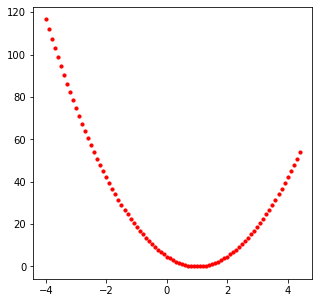

In [20]:
# w와 cost와의 관계 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
for i in range(len(cost)):
    plt.scatter(cost[i].keys(), cost[i].values(), c='r', s=10)
    

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

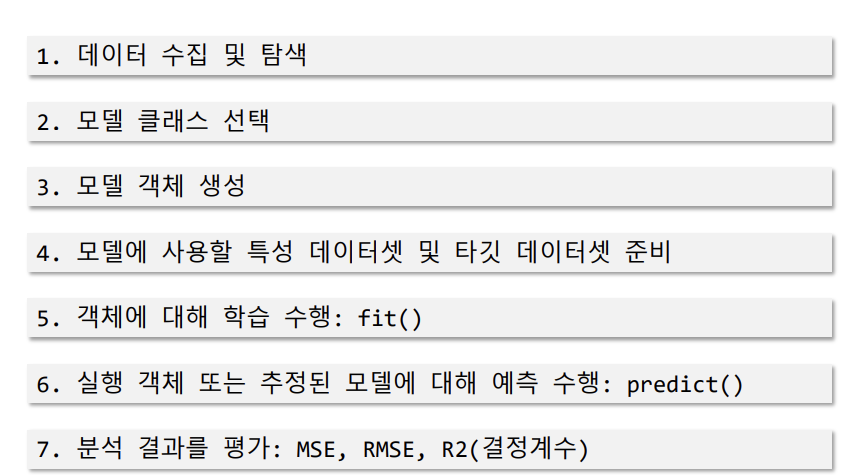

### 필요한 모듈 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [4]:
beer = pd.read_csv("data (1)/beer.csv")
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

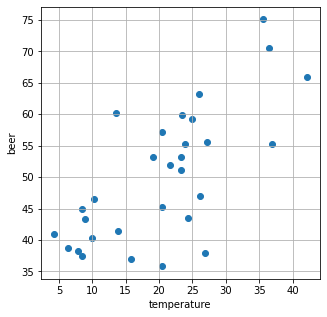

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(beer['temperature'],beer['beer']) #각 시리즈 매칭
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

In [13]:
# 독립 변수확인
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [14]:
# 종속 변수 확인
print(beer['beer'])
# 레코드 수 확인
print(len(beer))

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64
30


###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [11]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
import numpy as np

#독립변수, 종속변수 데이터셋 준비
X = np.array(beer['temperature']).reshape(-1,1)
y = beer['beer']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=1)

#1차원을 2차원으로 만들어 주려면 np.array().reshape(-1,1) 
#1.series를 dataframe으로 만들기
#2.ndarray 차수 증가

In [14]:
len(X_train)

24

In [16]:
#X_test
len(X_test)

6

### 모델 구축

In [17]:
from sklearn.linear_model import LinearRegression
#모델 클래스 선택 후 인스턴스 객체 생성

lr = LinearRegression()
#LinearRegrression(fit_intercept = False , normalize = True)

In [18]:
# 학습 수행
reg = lr.fit(X_train,y_train)

In [19]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_, reg.intercept_

(array([0.69705648]), 36.06666541566105)

In [ ]:
##coef : 계수 , intercept: 절편

In [26]:
#회귀식
print("y = {:.2f}x + {:.3f}".format(reg.coef_[0],reg.intercept_))

y = 0.70x + 36.067


In [ ]:
##첫번째 coef <- 0 
#{:.2f}  #2:자릿수/.:소수점 이하

In [27]:
# 구축된 모델에서 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred,2))

[60.81 50.36 54.33 50.36 41.92 43.18]


In [ ]:
##2: 소숫점 2자리 끊음
#np :브로드캐스팅이 가능한
#round 소수점자릿수 짜르겠다

### 모델 성능 평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#MSE
mse = mean_squared_error(y_test, y_pred)
#RMSE
rmse = np.sqrt(mse)

print("MSE:", np.round(mse,3))
print("RMSE:", np.round(rmse,3))


In [ ]:
## mse를 metrics에서 가져옴
#mean_squared_error(종속변수(실제값), 예측값)

In [ ]:
#결정계수 R2
r2 = r2_score(y_test , y_pred)
print("R2:", np.round(r2,3))

In [ ]:
##r2_score(실제값,예측값)

### 시각화

In [ ]:
#y = 0.697056X + 36.06 시각화
plt.figure(figsize=(5,5))
xx= np.arrange(beer['temperature'].min()-1,＼beer['temperature'].max()+1)
yy=reg.predict(xx.reshape(len(xx),1))

plt.plot(xx,yy,linestyle='--',color='red')

# 수집한 데이터셋 시각화
plt.scatter(beer['temperature'],beer['beer'])

plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

In [ ]:
##plt.figure 스케치북 잡음
#np.arrange - x의 최솟값 -1 , x최댓값+1 의 범위까지 numpy해서 발생 (arrange 범위 가짐)
#xx.reshape(len(xx)x의 길이에서,1만큼)2차원 배열로 늘려준다.
#plt.plot 선을 그어줌
#plt.scatter 원데이터 점 찍어줌 - scatter(x,y)

# 응용1. 나이, 키의 관계를 회귀 분석

In [16]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 생성/수집

In [21]:
data_df = pd.read_csv("C:/Users/Lee seohyun/Downloads/data (1)/age_height.csv" )

#### 데이터 탐색

In [ ]:
# 데이터 분포 시각화

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(data_df['age(X)'],data_df['beer(y)'])
plt.grid

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [ ]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
X = np.array(data_df['age(X)']).reshape(-1,1)
y= data_df['height(T)']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=1)

In [ ]:
#####모델 구축 및 예측

In [ ]:
#모델 객체 생성  및 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
# 예측 수행
y_pred = reg.predict(X_test)

In [ ]:
#####모델 성능 평가

#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용
from sklearn.metrics import mean_squared_error, r2_score


# MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

#결정계수 R2
r2 = r2_score(y_test, y_pred)

print("MSE:",np.round(mse,3))#보고하기
print("RMSE:",np.round(rmse,3))
print("R2:",np.round(r2,3))
print("coef:",reg.coef_)
print("intercept:",reg.intercept_)

#회귀식
print("y = {:.2f}X+{:.3f}".format(reg.coef_[0], ref.intercept_))

In [ ]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화


#y = 0.697056X + 36.06 시각화
plt.figure(figsize=(5,5))
plt.scatter(data_df['age(X)'],data_df['height(T)'],color='red')

xx=np.arrange(data_df['age(X)'],data_df['height(T)'],color='red')
yy= reg.predict(xx.reshape(len(xx),1))
plt.plot(xx,yy, linestyle='--', color='g')
plt.grid()
plt.show() 

# < 스탯츠모델에서 단순선형회귀 수행>

In [20]:
#스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
# 데이터 생성
beer = pd.read_csv('./data/beer.csv')

#독립변수, 종속변수 데이터셋 준비
import numpy as np

X=np.array(beer['temperature']).reshape(-1,1)
y= beer['beer']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(/X,y,test_size =0.2,/ random_state=1)


In [ ]:
##독립변수X :일차원 Series->2차원으로 만들어줌(리셰이프)


In [ ]:
##(설명을 위해)
#X_test
#sm.add_constant(X_test) #절편이 생김 

In [ ]:
# 스탯츠모델
X_train = sm.add_constant(X_train)
#다시 X_train으로 받음 
X_test = sm.add_constant(X_test)

lr= sm.OLS(y_train, X_train)
reg = lr.fit()

In [ ]:
##스탯츠 모델에서는 기본적 -> 절편값을 넣지 않음 : 절편값을 만들 수 있도록 X데이터의 정보에 상수항을 하나 추가해줌(add_constant)
#OLS객체를 만듬 (생성자 만듬) , 리니어와 달리 스탯츠에서는 생성자를 미리줌 (y train을 먼저주고 x train을 줌)

In [ ]:
# 성능 평가
print(reg.summary())

In [ ]:
##

# 응용2: 보스턴 집값 선형 회귀(statsmodel)

### 데이터 수집

In [54]:
from sklearn.datasets import load_boston
boston = load_boston()

### 데이터 탐색

In [55]:
dir(boston)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__']

In [29]:
print(boston.DESCR)
##target (arttribute 14 - MEDV:종속변수)정답 -> 지도학습

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
print(boston.data[:5])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


In [37]:
print(boston.target[:5]) #앞에서 5개만 봄 

[24.  21.6 34.7 33.4 36.2]


In [38]:
print(boston.feature_names[:5])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX']


### 데이터 준비

In [ ]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

In [31]:
import pandas as pd

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
X = pd.DataFrame(df['RM'])
y = boston.target
##column 명 가져옴

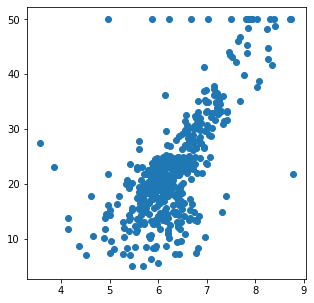

In [42]:
#데이터 탐색
plt.figure(figsize=(5,5))
plt.scatter(X,y)
plt.show()

### 학습용/ 검증용 데이터 분리

In [45]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state=1)

### 모델 구축

In [49]:
####모델 구축 및 예측

#모델 클래스 선택 후 인스턴스 객체 생성
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#모델 객체 생성 및 학습
reg = lr.fit(X_train, y_train)

# 예측 수행
y_pred = reg.predict(X_test)
print(np.round(y_pred,2))

#여기 강의보고 다시 

[27.38 26.08 20.45 19.16 14.8  23.34 25.53 20.8  19.78 23.72 26.54 27.59
 17.92 18.39 20.39 16.88 25.69 43.25 21.57 11.11 17.7  17.05 24.99 23.71
 22.65 19.32 21.01 20.31 33.06 15.03 25.09 16.85 37.41 22.32 21.41 19.57
 23.08 29.9   4.44 21.16 23.01 22.82 25.42 21.57 21.76 27.17 35.44 19.24
 21.05 23.62 28.49 23.22 23.83 22.89 12.52 24.05 18.94 21.23 20.11 39.21
 23.67 25.53 18.05 23.14 15.22 28.49 39.97 24.76 20.27 18.96 22.84  8.79
 11.42 25.9  21.27 18.18 28.79 24.03 24.51 29.91 23.84 20.37 30.22 25.52
 24.34 23.11 23.72 23.84 18.45 23.03 28.45 43.07 20.05 20.3  21.9  20.27
 25.21 23.94 39.37 21.85 18.82 24.3  21.63 21.42 14.08 22.16 16.51 22.31
 21.49 26.8  32.63 23.72 21.83 32.21 31.47 30.16 20.07 15.59 28.86 39.63
 19.08 26.36 26.71 22.32 24.98 20.36 21.27 21.21 16.57 26.35 18.38 23.43
 21.98 12.04 25.43 30.65 15.14 19.99 35.13 28.39 19.65 21.47 18.81 24.27
 27.48 21.11 23.8  20.22 25.48 19.87 30.37 18.61]


### 모델 평가

In [51]:
#####모델 성능 평가

#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용
from sklearn.metrics import mean_squared_error, r2_score


# MSE
mse = mean_squared_error(y_test, y_pred)

#RMSE
rmse = np.sqrt(mse)

#결정계수 R2
r2 = r2_score(y_test, y_pred)

print("MSE:",np.round(mse,3))#보고하기
print("RMSE:",np.round(rmse,3))
print("R2:",np.round(r2,3))
print("coef:",reg.coef_)
print("intercept:",reg.intercept_)

#회귀식
print("y = {:.2f}X+{:.3f}".format(reg.coef_[0], reg.intercept_))

MSE: 36.517
RMSE: 6.043
R2: 0.602
coef: [8.46109164]
intercept: -30.571032410898315
y = 8.46X+-30.571


### 시각화

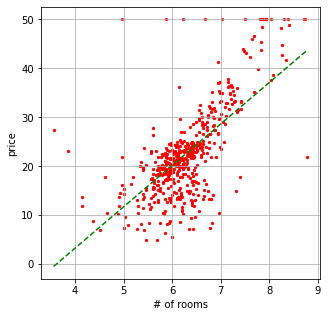

In [52]:
plt.figure(figsize=(5,5))
plt.scatter(X,y,c='r',s=5)

xx=np.linspace(X.min(),X.max())
yy= reg.predict(xx.reshape(len(xx),1))
plt.plot(xx,yy, linestyle='--', color='g')

plt.xlabel('# of rooms')
plt.ylabel('price')
plt.grid()
plt.show() 